# Numerical minimum-error discrimination eigensystem for the two-box problem

## Context

In this notebook the eigensystem which leads to the optimal measurement for minimum-error discrimination (MD) for the two-box problem (2BP) is numerically computed using the standard numpy methods

## Outputs

- Numerically computed optimal measurement vectors for the 2BP
- Numerically computed minimum expected error probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, binom
from itertools import combinations
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# simulation parameters

n = 7 # half-number of photons
N = 2*n # total number of photons
d = 2**N # hilbert space dimension
etaA = 0.5 # prior probability of box A
etaB = 1-etaA # prior probability of box B

In [3]:
# load full density matrices

rhoA = np.load("../full_density_matrices/rhoA_N{:d}_num.npy".format(N))
rhoB = np.load("../full_density_matrices/rhoB_N{:d}_num.npy".format(N))

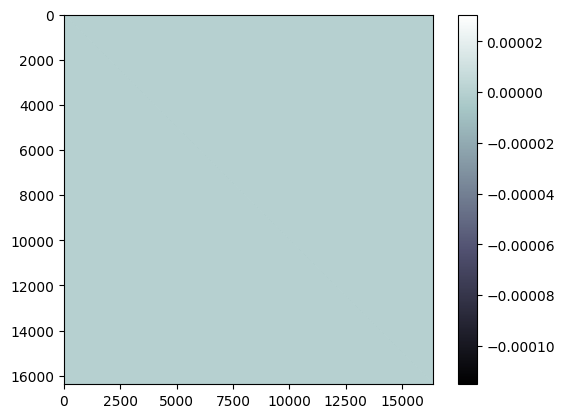

In [4]:
# compute and visualize the optimal measurement matrix

lamda = etaB*rhoB - etaA*rhoA
plt.imshow(np.real(lamda), cmap='bone')
plt.colorbar()
plt.show()

In [ ]:
# compute eigensystem

eigvals, eigvecs = np.linalg.eig(lamda)
eigvals = np.real(eigvals) # discard imaginary part (theoretically must be zero)

In [7]:
# sort and save eigenvalues and eigenvectors

inds = eigvals.argsort()
eigvals = eigvals[inds[::-1]] # sort in decreasing order
eigvecs = eigvecs[:,inds[::-1]]

np.save("data/eigvals_md_2bp_num_N{:d}.npy".format(N), eigvals)
np.save("data/eigvecs_md_2bp_num_N{:d}.npy".format(N), eigvecs)

In [8]:
# save the minimum expected error probability

Perr = 0.5*(1 - np.sum(np.abs(eigvals)))
print(Perr)
np.savetxt("../data/perr_md_2bp_num_N{:d}.txt".format(N), [Perr])

0.2500000000000001


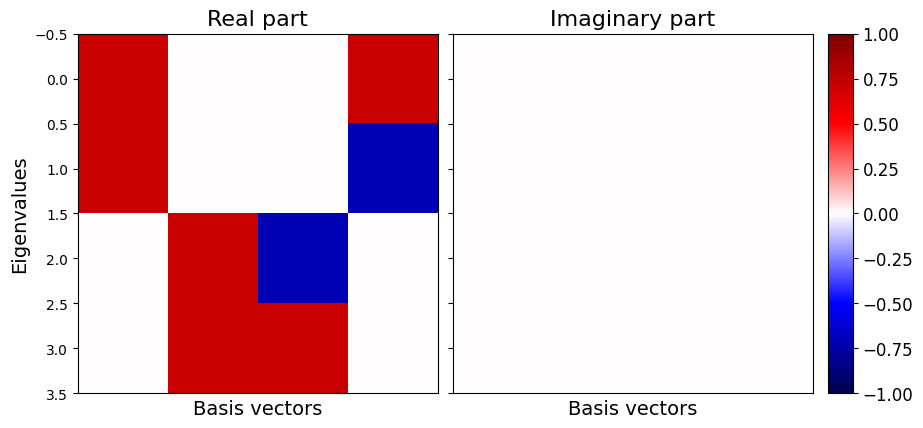

In [9]:
# visualize eigensystem structure

fig = plt.figure(figsize=(10,5))
color = "seismic"

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )

grid[0].imshow(np.real(eigvecs).T,cmap=color,vmin=-1,vmax=1)
grid[0].set_ylabel("Eigenvalues",fontsize=14)
#grid[0].set_yticks(range(d),np.round(eigvals+1e-10,2),fontsize=12)
grid[0].set_xlabel("Basis vectors",fontsize=14)
grid[0].set_xticks([])
grid[0].set_title("Real part",fontsize=16)
im = grid[1].imshow(np.imag(eigvecs).T,cmap=color, vmin=-1,vmax=1)
grid[1].set_xlabel("Basis vectors",fontsize=14)
grid[1].set_xticks([])
grid[1].set_title("Imaginary part",fontsize=16)
#grid[1].set_yticks([])

# Colorbar
cbar = grid[1].cax.colorbar(im)
cbar.ax.tick_params(labelsize=12)
grid[1].cax.toggle_label(True)

plt.savefig("../figures/eigsys_md_2bp_num_N{:d}.jpg".format(N), dpi=300)
#plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
plt.show()

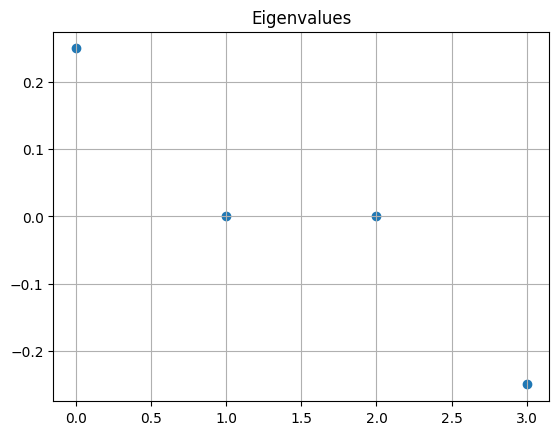

In [113]:
plt.title("Eigenvalues")
plt.scatter(range(2**N),eigvals)
plt.grid()
plt.show()

## Conclusion

La medida más óptima para discernir dos estados mixtos de 2n fotones es en general muy compleja y requiere de proyecciones sobre estados entrelazados multipartita. Es decir, requieren POVMs globales con forma compleja. En el caso de dos fotones, la POVM más óptima es una medición de Bell.